In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [2]:
temp_k = 298 #Kelvin
p = 101325 #Pascal
constant = 287
rho = p/(constant * temp_k)#Write the formula to calculate density in kg/m^3 (use R for air as 287 K /Kg K)

In [79]:
def find_C_X(X, rho, u_inf, s):
    """
    find coefficient of lift or drag
    """
    top = 2*X
    bottom = rho * s * u_inf**2
    return top/bottom

def import_data():
    raw_data = pd.read_csv("./FW_data.csv")
    keys = raw_data.columns
    b = 1.11 
    c = 0.4 
    bf = 2*b

    S = bf*c 

    alpha = raw_data[keys[0]]
    drag = 2*raw_data[keys[1]]
    lift = 2*raw_data[keys[2]]
    cls = find_C_X(lift, rho, u_inf, S)
    cds = find_C_X(drag, rho, u_inf, S)
    
    return {
        "alpha": alpha,
        "C_L": cls,
        "lift": lift,
        "drag": drag,
        "C_D": cds,
    }

In [83]:
data=import_data()

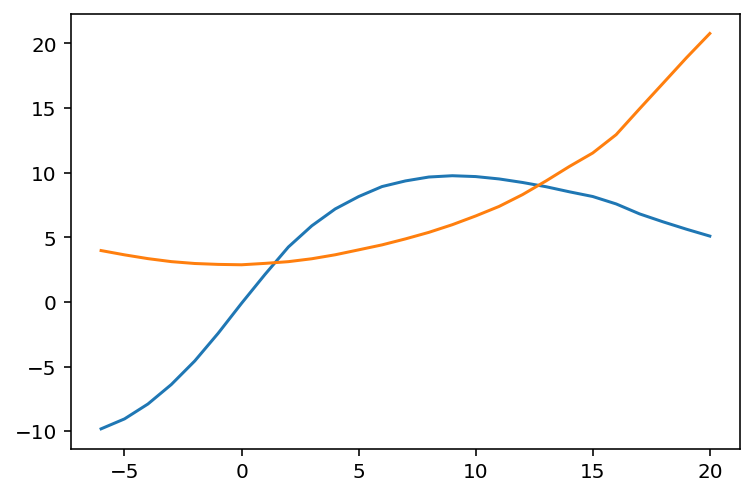

In [90]:
plt.plot(data["alpha"],data["C_L"]/data["C_D"])
plt.plot(data["alpha"],data["C_D"]*100)

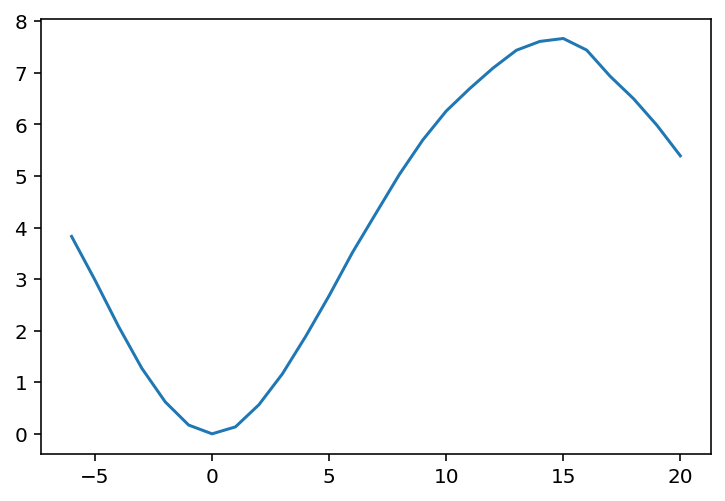

In [87]:
plt.plot(data["alpha"],(data["C_L"]**2)/data["C_D"])

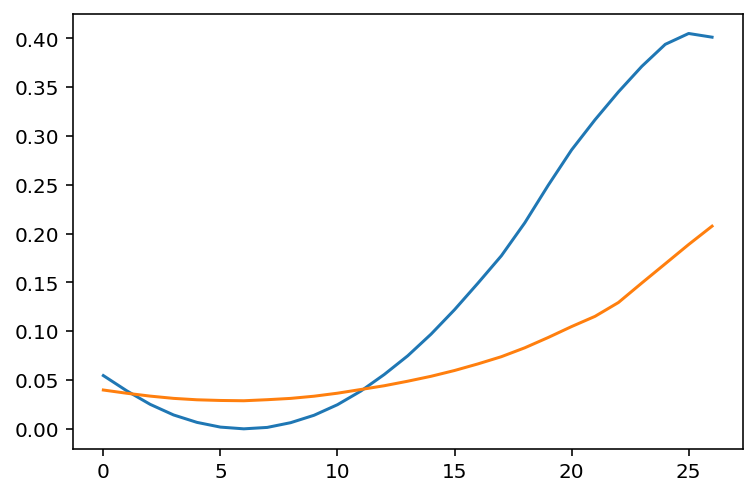

In [95]:
CDi = data["C_L"]**2/(np.pi*2.22*0.4)
plt.plot(CDi)
plt.plot(data["C_D"])

In [97]:
2.22/0.4

5.55